In [1]:
import pandas as pd
import numpy as np
import ta
import time
from binance import Client
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
API_KEY = '51VWSoPwYC5pe0DimYUxdVHustgbWVXHPhOuexwVoTSBUVrjYENv64ptJMeYKCVK'
SECRET_KEY = 'vJt1mc4tGsvTqcYXYSzdyOW9l8kOXdechwrXPru6dLQQtv8fFkQHHUg1fKuOwDAz'

In [3]:
client = Client(API_KEY, SECRET_KEY)

In [ ]:
df = pd.DataFrame(client.get_historical_klines('DOTUSDT', '1m', '100 min ago UTC'))

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1660301940000,9.13000000,9.13000000,9.11000000,9.12000000,13514.70000000,1660301999999,123266.37170000,126,2746.16000000,25060.66860000,0
1,1660302000000,9.12000000,9.12000000,9.08000000,9.12000000,32341.99000000,1660302059999,294168.44890000,604,12365.13000000,112476.26490000,0
2,1660302060000,9.12000000,9.15000000,9.11000000,9.14000000,7103.78000000,1660302119999,64847.22840000,200,3845.12000000,35090.34730000,0
3,1660302120000,9.14000000,9.14000000,9.11000000,9.12000000,5168.03000000,1660302179999,47136.59180000,71,961.94000000,8776.06360000,0
4,1660302180000,9.11000000,9.12000000,9.10000000,9.12000000,4149.47000000,1660302239999,37821.33280000,63,2611.32000000,23800.57550000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1660307640000,9.17000000,9.18000000,9.16000000,9.17000000,7339.45000000,1660307699999,67330.77170000,56,6687.18000000,61353.08820000,0
96,1660307700000,9.18000000,9.19000000,9.17000000,9.17000000,3647.46000000,1660307759999,33478.90590000,81,1337.01000000,12274.59930000,0
97,1660307760000,9.18000000,9.20000000,9.18000000,9.20000000,11311.38000000,1660307819999,103967.00650000,201,7128.63000000,65524.30390000,0
98,1660307820000,9.19000000,9.19000000,9.18000000,9.18000000,1985.40000000,1660307879999,18239.90240000,42,872.04000000,8014.04760000,0


In [ ]:
df = df.iloc[:, :6]

df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
df

,Time,Open,High,Low,Close,Volume
0,1660301940000,9.13000000,9.13000000,9.11000000,9.12000000,13514.70000000
1,1660302000000,9.12000000,9.12000000,9.08000000,9.12000000,32341.99000000
2,1660302060000,9.12000000,9.15000000,9.11000000,9.14000000,7103.78000000
3,1660302120000,9.14000000,9.14000000,9.11000000,9.12000000,5168.03000000
4,1660302180000,9.11000000,9.12000000,9.10000000,9.12000000,4149.47000000
...,...,...,...,...,...,...
95,1660307640000,9.17000000,9.18000000,9.16000000,9.17000000,7339.45000000
96,1660307700000,9.18000000,9.19000000,9.17000000,9.17000000,3647.46000000
97,1660307760000,9.18000000,9.20000000,9.18000000,9.20000000,11311.38000000
98,1660307820000,9.19000000,9.19000000,9.18000000,9.18000000,1985.40000000


In [ ]:
df.index = pd.to_datetime(df['Time'], unit='ms')

In [ ]:
df = df.astype(float)

In [ ]:
df

,Time,Open,High,Low,Close,Volume
Time,,,,,,
2022-08-12 10:59:00,1.660302e+12,9.13,9.13,9.11,9.12,13514.70
2022-08-12 11:00:00,1.660302e+12,9.12,9.12,9.08,9.12,32341.99
2022-08-12 11:01:00,1.660302e+12,9.12,9.15,9.11,9.14,7103.78
2022-08-12 11:02:00,1.660302e+12,9.14,9.14,9.11,9.12,5168.03
2022-08-12 11:03:00,1.660302e+12,9.11,9.12,9.10,9.12,4149.47
...,...,...,...,...,...,...
2022-08-12 12:34:00,1.660308e+12,9.17,9.18,9.16,9.17,7339.45
2022-08-12 12:35:00,1.660308e+12,9.18,9.19,9.17,9.17,3647.46
2022-08-12 12:36:00,1.660308e+12,9.18,9.20,9.18,9.20,11311.38


In [ ]:
df['%K'] = ta.momentum.stoch(df.High, df.Low, df.Close)
df['%D'] = df['%K'].rolling(3).mean()

df['rsi'] = ta.momentum.rsi(df.Close, window=14)

df['macd'] = ta.trend.macd_diff(df.Close)

df = df.dropna()

In [ ]:
df

,Time,Open,High,Low,Close,Volume,%K,%D,rsi,macd
Time,,,,,,,,,,
2022-08-12 11:32:00,1.660304e+12,9.09,9.10,9.07,9.07,12016.41,0.000000,4.166667,29.688668,-0.006587
2022-08-12 11:33:00,1.660304e+12,9.07,9.09,9.04,9.05,23545.78,9.090909,7.196970,25.784648,-0.008786
2022-08-12 11:34:00,1.660304e+12,9.06,9.09,9.06,9.08,14025.72,40.000000,16.363636,38.787471,-0.007743
2022-08-12 11:35:00,1.660304e+12,9.07,9.10,9.07,9.09,16935.54,50.000000,33.030303,42.409549,-0.005981
2022-08-12 11:36:00,1.660304e+12,9.09,9.10,9.07,9.08,6201.08,40.000000,43.333333,39.868945,-0.005124
...,...,...,...,...,...,...,...,...,...,...
2022-08-12 12:34:00,1.660308e+12,9.17,9.18,9.16,9.17,7339.45,66.666667,58.333333,55.169861,-0.001938
2022-08-12 12:35:00,1.660308e+12,9.18,9.19,9.17,9.17,3647.46,50.000000,50.000000,55.169861,-0.001774
2022-08-12 12:36:00,1.660308e+12,9.18,9.20,9.18,9.20,11311.38,100.000000,72.222222,64.627753,0.000250


In [52]:
dfx = pd.DataFrame()

for i in range(5):
    mask = (df['%K'].shift(i) < 20) & (df['%D'].shift(i) < 20)
    dfx = pd.concat([dfx, mask], axis=1, ignore_index=True)
    

In [53]:
dfx

,0,1,2,3,4
2022-08-12 11:32:00,True,False,False,False,False
2022-08-12 11:33:00,True,True,False,False,False
2022-08-12 11:34:00,False,True,True,False,False
2022-08-12 11:35:00,False,False,True,True,False
2022-08-12 11:36:00,False,False,False,True,True
...,...,...,...,...,...
2022-08-12 12:34:00,False,False,False,False,False
2022-08-12 12:35:00,False,False,False,False,False
2022-08-12 12:36:00,False,False,False,False,False
2022-08-12 12:37:00,False,False,False,False,False


In [43]:
dfx = pd.DataFrame()

for i in range(5):
    mask = (df['%K'].shift(i) < 20) & (df['%D'].shift(i) < 20)
    dfx = dfx.append(mask, ignore_index=True)


In [47]:
dfx

Time,2022-08-12 11:32:00,2022-08-12 11:33:00,2022-08-12 11:34:00,2022-08-12 11:35:00,2022-08-12 11:36:00,2022-08-12 11:37:00,2022-08-12 11:38:00,2022-08-12 11:39:00,2022-08-12 11:40:00,2022-08-12 11:41:00,...,2022-08-12 12:29:00,2022-08-12 12:30:00,2022-08-12 12:31:00,2022-08-12 12:32:00,2022-08-12 12:33:00,2022-08-12 12:34:00,2022-08-12 12:35:00,2022-08-12 12:36:00,2022-08-12 12:37:00,2022-08-12 12:38:00
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
dfx.sum(axis=0)

Time
2022-08-12 11:32:00    1
2022-08-12 11:33:00    2
2022-08-12 11:34:00    2
2022-08-12 11:35:00    2
2022-08-12 11:36:00    2
                      ..
2022-08-12 12:34:00    0
2022-08-12 12:35:00    0
2022-08-12 12:36:00    0
2022-08-12 12:37:00    0
2022-08-12 12:38:00    0
Length: 67, dtype: int64

In [35]:
mask1 = (df['%K'].shift(1) < 20) & (df['%D'].shift(1) < 20)
mask1

Time
2022-08-12 11:32:00    False
2022-08-12 11:33:00     True
2022-08-12 11:34:00     True
2022-08-12 11:35:00    False
2022-08-12 11:36:00    False
                       ...  
2022-08-12 12:34:00    False
2022-08-12 12:35:00    False
2022-08-12 12:36:00    False
2022-08-12 12:37:00    False
2022-08-12 12:38:00    False
Length: 67, dtype: bool

In [36]:
mask2 = (df['%K'].shift(2) < 20) & (df['%D'].shift(2) < 20)
mask2

Time
2022-08-12 11:32:00    False
2022-08-12 11:33:00    False
2022-08-12 11:34:00     True
2022-08-12 11:35:00     True
2022-08-12 11:36:00    False
                       ...  
2022-08-12 12:34:00    False
2022-08-12 12:35:00    False
2022-08-12 12:36:00    False
2022-08-12 12:37:00    False
2022-08-12 12:38:00    False
Length: 67, dtype: bool

In [39]:
pd.concat([mask1, mask2], axis=1).sum(axis=1)

Time
2022-08-12 11:32:00    0
2022-08-12 11:33:00    1
2022-08-12 11:34:00    2
2022-08-12 11:35:00    1
2022-08-12 11:36:00    0
                      ..
2022-08-12 12:34:00    0
2022-08-12 12:35:00    0
2022-08-12 12:36:00    0
2022-08-12 12:37:00    0
2022-08-12 12:38:00    0
Length: 67, dtype: int64

In [23]:
dfx

Time,2022-08-12 11:32:00,2022-08-12 11:33:00,2022-08-12 11:34:00,2022-08-12 11:35:00,2022-08-12 11:36:00,2022-08-12 11:37:00,2022-08-12 11:38:00,2022-08-12 11:39:00,2022-08-12 11:40:00,2022-08-12 11:41:00,...,2022-08-12 12:29:00,2022-08-12 12:30:00,2022-08-12 12:31:00,2022-08-12 12:32:00,2022-08-12 12:33:00,2022-08-12 12:34:00,2022-08-12 12:35:00,2022-08-12 12:36:00,2022-08-12 12:37:00,2022-08-12 12:38:00
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
mask

Time
2022-08-11 19:31:00    False
2022-08-11 19:32:00    False
2022-08-11 19:33:00    False
2022-08-11 19:34:00    False
2022-08-11 19:35:00    False
                       ...  
2022-08-11 20:33:00    False
2022-08-11 20:34:00    False
2022-08-11 20:35:00    False
2022-08-11 20:36:00    False
2022-08-11 20:37:00    False
Length: 67, dtype: bool

In [84]:
dfx.sum(axis=0)

Time
2022-08-11 19:31:00    0
2022-08-11 19:32:00    0
2022-08-11 19:33:00    0
2022-08-11 19:34:00    0
2022-08-11 19:35:00    0
                      ..
2022-08-11 20:33:00    0
2022-08-11 20:34:00    0
2022-08-11 20:35:00    0
2022-08-11 20:36:00    0
2022-08-11 20:37:00    0
Length: 67, dtype: int64

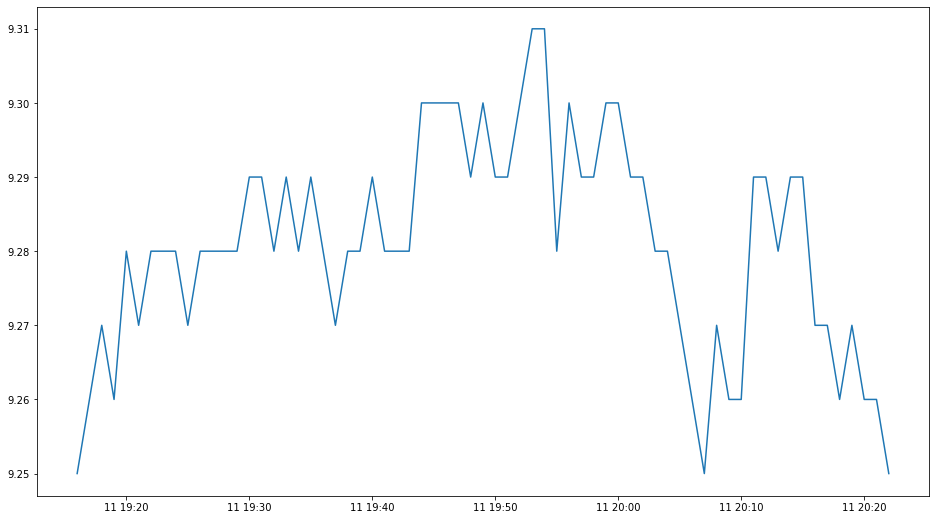

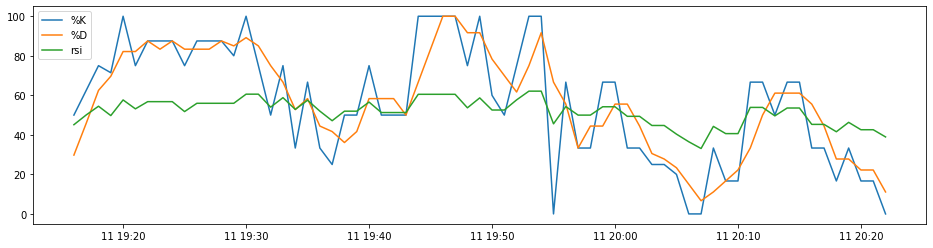

In [26]:
plt.figure(figsize=(16,9))
plt.plot(df.Close)
plt.show()


plt.figure(figsize=(16,4))
plt.plot(df[['%K', '%D', 'rsi']], label=['%K', '%D', 'rsi'])
plt.legend(loc="upper left")
plt.show()

In [60]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol,
                                                      interval,
                                                      lookback + ' min ago UTC'))
    frame = frame.iloc[:, :6]
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    frame.index = pd.to_datetime(frame['Time'], unit='ms')
    frame = frame.drop('Time', axis=1)
    frame = frame.astype(float)
    
    return frame

In [66]:
df = getminutedata('DOTUSDT', '1m', '100')

In [67]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2022-08-11 18:55:00,9.26,9.27,9.26,9.26,2047.33
2022-08-11 18:56:00,9.26,9.27,9.26,9.27,864.43
2022-08-11 18:57:00,9.26,9.27,9.26,9.27,1470.06
2022-08-11 18:58:00,9.27,9.29,9.27,9.29,2390.89
2022-08-11 18:59:00,9.28,9.29,9.27,9.27,5079.34
...,...,...,...,...,...
2022-08-11 20:30:00,9.31,9.31,9.30,9.31,2598.52
2022-08-11 20:31:00,9.30,9.31,9.30,9.30,7460.43
2022-08-11 20:32:00,9.30,9.32,9.30,9.32,1896.46


In [68]:
def applytechnicals(df):
    
    df['%K'] = ta.momentum.stoch(df.High, df.Low, df.Close, window=14, smooth_window=3)
    df['%D'] = df['%K'].rolling(3).mean()
    df['rsi'] = ta.momentum.rsi(df.Close, window=14)
    df['macd'] = ta.trend.macd_diff(df.Close)
    df = df.dropna()
    
    return df

In [69]:
applytechnicals(df)

,Open,High,Low,Close,Volume,%K,%D,rsi,macd
Time,,,,,,,,,
2022-08-11 19:28:00,9.29,9.29,9.28,9.28,506.24,87.500000,87.500000,56.849258,0.001821
2022-08-11 19:29:00,9.28,9.29,9.28,9.28,3343.52,80.000000,85.000000,56.849258,0.001594
2022-08-11 19:30:00,9.29,9.29,9.28,9.29,1644.18,100.000000,89.166667,61.536053,0.001973
2022-08-11 19:31:00,9.28,9.30,9.27,9.29,6862.32,75.000000,85.000000,61.536053,0.002069
2022-08-11 19:32:00,9.28,9.30,9.28,9.28,2534.02,50.000000,75.000000,54.651734,0.001341
...,...,...,...,...,...,...,...,...,...
2022-08-11 20:30:00,9.31,9.31,9.30,9.31,2598.52,100.000000,88.888889,64.276049,0.005474
2022-08-11 20:31:00,9.30,9.31,9.30,9.30,7460.43,83.333333,94.444444,58.679199,0.005092
2022-08-11 20:32:00,9.30,9.32,9.30,9.32,1896.46,100.000000,94.444444,65.204902,0.005859


In [70]:
df

,Open,High,Low,Close,Volume,%K,%D,rsi,macd
Time,,,,,,,,,
2022-08-11 18:55:00,9.26,9.27,9.26,9.26,2047.33,NaN,NaN,NaN,NaN
2022-08-11 18:56:00,9.26,9.27,9.26,9.27,864.43,NaN,NaN,NaN,NaN
2022-08-11 18:57:00,9.26,9.27,9.26,9.27,1470.06,NaN,NaN,NaN,NaN
2022-08-11 18:58:00,9.27,9.29,9.27,9.29,2390.89,NaN,NaN,NaN,NaN
2022-08-11 18:59:00,9.28,9.29,9.27,9.27,5079.34,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-11 20:30:00,9.31,9.31,9.30,9.31,2598.52,100.000000,88.888889,64.276049,0.005474
2022-08-11 20:31:00,9.30,9.31,9.30,9.30,7460.43,83.333333,94.444444,58.679199,0.005092
2022-08-11 20:32:00,9.30,9.32,9.30,9.32,1896.46,100.000000,94.444444,65.204902,0.005859


In [109]:
class Signals:
    def __init__(self, df, lags):
        self.df = df
        self.lags = lags
        
    def gettrigger(self):
        dfx = pd.DataFrame()
        for i in range(self.lags+1):
            mask = (self.df['%K'].shift(i) < 20) & (self.df['%D'].shift(i) < 20)
            dfx = dfx.append(mask, ignore_index=True)
        return dfx.sum(axis=0)
    
    def decide(self):
        self.df['trigger'] = np.where(self.gettrigger(), 1, 0)
        
        self.df['Buy'] = np.where((self.df['trigger']) &
                                    (self.df['%K'].between(20, 80)) &
                                    (self.df['%D'].between(20, 80)) &
                                    (self.df['rsi'] > 50) &
                                    (self.df['macd'] > 0), 1, 0)

In [120]:
inst = Signals(df, 5)

In [121]:
inst.decide()

/tmp/ipykernel_64/3258588883.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_64/3258588883.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_64/3258588883.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_64/3258588883.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_64/3258588883.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [122]:
df[df['Buy'] == 1]

,Time,Open,High,Low,Close,Volume,%K,%D,rsi,macd,trigger,Buy
Time,,,,,,,,,,,,
2022-08-11 20:12:00,1.660249e+12,9.28,9.29,9.28,9.29,223.98,66.666667,50.000000,53.866321,0.000114,1,1
2022-08-11 20:14:00,1.660249e+12,9.28,9.31,9.28,9.29,6717.69,66.666667,61.111111,53.559440,0.001408,1,1
2022-08-11 20:26:00,1.660250e+12,9.26,9.29,9.26,9.28,3588.82,50.000000,27.777778,53.260958,0.000510,1,1
2022-08-11 20:27:00,1.660250e+12,9.28,9.30,9.28,9.29,4681.62,66.666667,44.444444,57.229119,0.002034,1,1


In [136]:
def strategy(pair, qty, open_position=False):
    df = getminutedata(pair, '1m', '100')
    df = applytechnicals(df)
    inst = Signals(df, 5)
    inst.decide()
    print(f'Current Close is ' + str(df['Close'].iloc[-1]))
    if df['Buy'].iloc[-1]:
        order = client.create_order(symbol=pair,
                                   side='BUY',
                                   type='MARKET',
                                   quantity=qty)
        print(order)
        buyprice = float(order['fills'][0]['price'])
        open_position = True
    while open_position:
        time.sleep(0.5)
        df = getminutedata(pair, '1m', '2')
        print(f'Current Close is ' + str(df['Close'].iloc[-1]))
        print(f'Current Target is ' + str(buyprice * 1.005))
        print(f'Current Stop is ' + str(buyprice * 0.995))
        if df['Close'][-1] <= buyprice * 0.995 or df['Close'][-1] >= 1.005 * buyprice:
            order = client.create_order(symbol=pair,
                                   side='SELL',
                                   type='MARKET',
                                   quantity=qty)
            print(order)
            break

In [138]:
while True:
    strategy('ETHUSDT', 0.01)
    time.sleep(0.5)

Current Close is 1898.01
Current Close is 1897.95
Current Close is 1897.95
Current Close is 1897.95
Current Close is 1897.95
Current Close is 1897.95
Current Close is 1897.94
Current Close is 1897.94
Current Close is 1897.94
Current Close is 1897.95
Current Close is 1897.95
Current Close is 1897.58
Current Close is 1897.58
Current Close is 1897.91
Current Close is 1897.91
Current Close is 1897.92
Current Close is 1897.92
Current Close is 1897.71
Current Close is 1897.66
Current Close is 1897.65
Current Close is 1897.66
Current Close is 1897.66
Current Close is 1897.66
Current Close is 1897.66
Current Close is 1897.66
Current Close is 1897.66
Current Close is 1897.7
Current Close is 1897.71
Current Close is 1897.71
Current Close is 1897.71
Current Close is 1897.71
Current Close is 1897.71
Current Close is 1897.82
Current Close is 1898.04
Current Close is 1898.35
Current Close is 1898.08
Current Close is 1898.07
Current Close is 1898.07
Current Close is 1897.84
Current Close is 1897.8
Cu

ReadTimeout: HTTPSConnectionPool(host='api.binance.com', port=443): Read timed out. (read timeout=10)